Original Maze:
S . . # . . .
# # . # . # .
. . . . . # .
. # # # . # .
. . . # . . E

Solving using BFS...
BFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6)]


<ipython-input-13-97ad3a3decc6>:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 5)


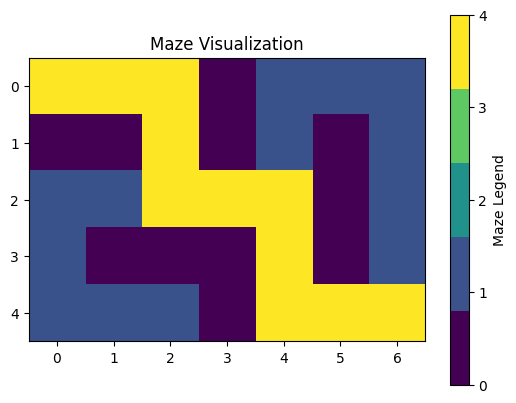


Solving using DFS...
DFS Path: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4), (4, 5), (4, 6)]


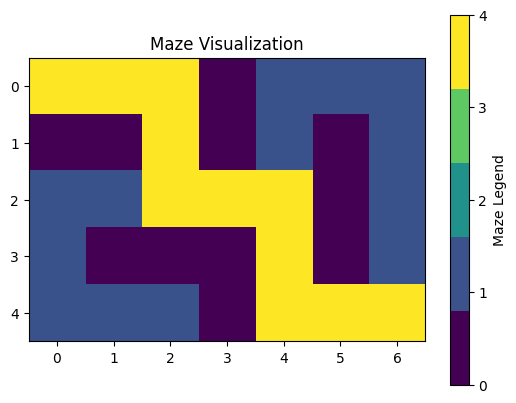

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

def visualize_maze(maze, path=None):
    """Visualizes the maze and highlights the path if provided."""
    maze_colors = {
        '#': 0,  # Wall
        '.': 1,  # Open path
        'S': 2,  # Start
        'E': 3   # End
    }

    grid = np.array([[maze_colors[cell] for cell in row] for row in maze])

    if path:
        for x, y in path:
            grid[x][y] = 4  # Path

    cmap = plt.cm.get_cmap('viridis', 5)
    plt.imshow(grid, cmap=cmap)
    plt.colorbar(ticks=range(5), label='Maze Legend')
    plt.title("Maze Visualization")
    plt.show()

def bfs_solver(maze, start, end):
    """Solves the maze using Breadth-First Search."""
    rows, cols = len(maze), len(maze[0])
    queue = deque([start])
    visited = set()
    parent = {}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while queue:
        x, y = queue.popleft()
        if (x, y) == end:
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#' and (nx, ny) not in visited:
                visited.add((nx, ny))
                queue.append((nx, ny))
                parent[(nx, ny)] = (x, y)

    # Reconstruct path
    path = []
    step = end
    while step != start:
        path.append(step)
        step = parent.get(step)
        if step is None:  # No path found
            return None
    path.append(start)
    path.reverse()
    return path

def dfs_solver(maze, start, end):
    """Solves the maze using Depth-First Search."""
    rows, cols = len(maze), len(maze[0])
    stack = [start]
    visited = set()
    parent = {}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]

    while stack:
        x, y = stack.pop()
        if (x, y) == end:
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#' and (nx, ny) not in visited:
                visited.add((nx, ny))
                stack.append((nx, ny))
                parent[(nx, ny)] = (x, y)

    # Reconstruct path
    path = []
    step = end
    while step != start:
        path.append(step)
        step = parent.get(step)
        if step is None:  # No path found
            return None
    path.append(start)
    path.reverse()
    return path

# Example Maze
def generate_sample_maze():
    return [
        ['S', '.', '.', '#', '.', '.', '.'],
        ['#', '#', '.', '#', '.', '#', '.'],
        ['.', '.', '.', '.', '.', '#', '.'],
        ['.', '#', '#', '#', '.', '#', '.'],
        ['.', '.', '.', '#', '.', '.', 'E']
    ]

def main():
    maze = generate_sample_maze()
    start = (0, 0)  # Start point (S)
    end = (4, 6)    # End point (E)

    print("Original Maze:")
    for row in maze:
        print(" ".join(row))

    print("\nSolving using BFS...")
    bfs_path = bfs_solver(maze, start, end)
    if bfs_path:
        print("BFS Path:", bfs_path)
        visualize_maze(maze, bfs_path)
    else:
        print("No path found using BFS.")

    print("\nSolving using DFS...")
    dfs_path = dfs_solver(maze, start, end)
    if dfs_path:
        print("DFS Path:", dfs_path)
        visualize_maze(maze, dfs_path)
    else:
        print("No path found using DFS.")

if __name__ == "__main__":
    main()


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
import time

# Visualization function
def visualize_maze(maze, path=None, explored=None):
    """Visualizes the maze and highlights the path and explored nodes."""
    maze_colors = {
        '#': 0,  # Wall
        '.': 1,  # Open path
        'S': 2,  # Start
        'E': 3   # End
    }

    grid = np.array([[maze_colors[cell] for cell in row] for row in maze])

    if explored:
        for x, y in explored:
            if grid[x][y] == 1:  # Avoid overwriting start, end, or walls
                grid[x][y] = 4  # Explored nodes

    if path:
        for x, y in path:
            grid[x][y] = 5  # Final path

    cmap = plt.cm.get_cmap('viridis', 6)
    plt.imshow(grid, cmap=cmap)
    plt.colorbar(ticks=range(6), label='Maze Legend')
    plt.title("Maze Visualization")
    plt.show()

# BFS Algorithm
def bfs_solver(maze, start, end):
    """Solves the maze using Breadth-First Search."""
    rows, cols = len(maze), len(maze[0])
    queue = deque([start])
    visited = set()
    parent = {}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    explored = []

    while queue:
        x, y = queue.popleft()
        explored.append((x, y))
        if (x, y) == end:
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#' and (nx, ny) not in visited:
                visited.add((nx, ny))
                queue.append((nx, ny))
                parent[(nx, ny)] = (x, y)

    # Reconstruct path
    path = []
    step = end
    while step != start:
        path.append(step)
        step = parent.get(step)
        if step is None:  # No path found
            return None, explored
    path.append(start)
    path.reverse()
    return path, explored

# DFS Algorithm
def dfs_solver(maze, start, end):
    """Solves the maze using Depth-First Search."""
    rows, cols = len(maze), len(maze[0])
    stack = [start]
    visited = set()
    parent = {}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    explored = []

    while stack:
        x, y = stack.pop()
        explored.append((x, y))
        if (x, y) == end:
            break

        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#' and (nx, ny) not in visited:
                visited.add((nx, ny))
                stack.append((nx, ny))
                parent[(nx, ny)] = (x, y)

    # Reconstruct path
    path = []
    step = end
    while step != start:
        path.append(step)
        step = parent.get(step)
        if step is None:  # No path found
            return None, explored
    path.append(start)
    path.reverse()
    return path, explored

# Bi-Directional BFS Algorithm
def bidirectional_bfs_solver(maze, start, end):
    """Finds the shortest path using Bi-Directional BFS."""
    rows, cols = len(maze), len(maze[0])
    queue_start = deque([start])
    queue_end = deque([end])
    visited_start = {start: None}
    visited_end = {end: None}
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    explored = []

    def merge_paths():
        """Merge paths from the two searches."""
        path_start = []
        step = meeting_point
        while step:
            
            path_start.append(step)
            step = visited_start[step]

        path_end = []
        step = visited_end[meeting_point]
        while step:
            path_end.append(step)
            step = visited_end[step]

        return path_start[::-1] + path_end

    while queue_start and queue_end:
        # Forward search
        x, y = queue_start.popleft()
        explored.append((x, y))
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#':
                if (nx, ny) not in visited_start:
                    visited_start[(nx, ny)] = (x, y)
                    queue_start.append((nx, ny))

                if (nx, ny) in visited_end:  # Meeting point found
                    meeting_point = (nx, ny)
                    return merge_paths(), explored

        # Backward search
        x, y = queue_end.popleft()
        explored.append((x, y))
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != '#':
                if (nx, ny) not in visited_end:
                    visited_end[(nx, ny)] = (x, y)
                    queue_end.append((nx, ny))

                if (nx, ny) in visited_start:  # Meeting point found
                    meeting_point = (nx, ny)
                    return merge_paths(), explored

    return None, explored

# Example Maze
def generate_sample_maze(size="medium"):
    if size == "small":
        return [
            ['S', '.', '#', 'E'],
            ['#', '.', '#', '.'],
            ['.', '.', '.', '.'],
            ['.', '#', '.', '.']
        ]
    elif size == "medium":
        return [
            ['S', '.', '.', '#', '.', '.', '.'],
            ['#', '#', '.', '#', '.', '#', '.'],
            ['.', '.', '.', '.', '.', '#', '.'],
            ['.', '#', '#', '#', '.', '#', '.'],
            ['.', '.', '.', '.', '.', '.', 'E']
        ]
    elif size == "large":
        return [
            ['S'] + ['.'] * 18 + ['E'],
            ['#'] * 20,
            ['.'] * 20
        ]

# Main Function
def main():
    print("Choose Maze Size (small, medium, large):")
    maze_size = input().strip().lower()
    maze = generate_sample_maze(maze_size)

    start = (0, 0)  # Start point (S)
    end = (len(maze) - 1, len(maze[0]) - 1)  # End point (E)

    print("Choose Algorithm (BFS, DFS, Bi-Directional BFS):")
    algorithm = input().strip().lower()

    print("Original Maze:")
    for row in maze:
        print(" ".join(row))

    start_time = time.time()

    if algorithm == "bfs":
        path, explored = bfs_solver(maze, start, end)
    elif algorithm == "dfs":
        path, explored = dfs_solver(maze, start, end)
    elif algorithm == "bi-directional bfs":
        path, explored = bidirectional_bfs_solver(maze, start, end)
    else:
        print("Invalid algorithm choice.")
        return

    end_time = time.time()

    if path:
        print(f"\n{algorithm.upper()} Path:", path)
        print(f"Nodes Explored: {len(explored)}")
        print(f"Time Taken: {end_time - start_time:.4f} seconds")
        visualize_maze(maze, path, explored)
    else:
        print("No path found.")

if __name__ == "__main__":
    main()


Choose Maze Size (small, medium, large):


 bfs


TypeError: object of type 'NoneType' has no len()

# Different Code

In [6]:
# Give an odd-numbered length and height otherwise the last wall will be unvisited

In [157]:
grid_length , grid_height = tuple(map(int, input("Enter grid_length: , Enter grid_widht: ").split()))

from IPython.display import HTML
import random

grid = [[ '#' for _ in range(grid_length)] for _ in range(grid_height)]

from IPython.display import HTML, display

def display_colored_grid(grid):
    # html = '<table style="border-collapse: collapse;">'

    # for row in grid:
    #     html += '<tr>'
    #     for cell in row:
    #         if cell == 1:
    #             color = 'black'
    #         elif cell == 0:
    #             color = 'white'
    #         elif cell == -1:
    #             color = 'purple'
    #         elif cell == 99:
    #             color = 'red'
    #         elif cell == 2:
    #             color = 'green'
    #         elif cell == 3:
    #             color = 'blue'
    #         html += f'<td style="width: 10px; height: 10px; background-color: {color}; border: 1px solid gray;"></td>'
    #     html += '</tr>'
    # html += '</table>'

    # display(HTML(html))
    

    for i in range(grid_height):
        for j in range(grid_length):
          if grid[i][j] == 1:
            print(grid[i][j], end=" ")
          else:
            print(grid[i][j], end = " ")
        print()

directions = [(0, 2), (2, 0), (-2, 0), (0, -2)]

def validate_cell(cell):
    return 0<= cell[0] < grid_length and 0<= cell[1] < grid_height and grid[cell[0]][cell[1]] == '#' 

import copy
maze = copy.deepcopy(grid)

visited = []

def create_maze(grid, cell):
    current_cell = cell
    visited.append(current_cell)
    grid[current_cell[0]][current_cell[1]] = '.'
    
    random.shuffle(directions) 
    
    for direction in directions:
        new_cell = tuple(a+b for a, b in zip(direction, current_cell))
        
        if validate_cell(new_cell):
            wall_cell = (current_cell[0] + direction[0] // 2, current_cell[1] + direction[1] // 2)
            # We divide by 2 because we want to the wall to disappear, when the function is called next time with that cell, the cell becomes a path
            grid[wall_cell[0]][wall_cell[1]] = '.'
            
            create_maze(grid, new_cell)

create_maze(grid, (0, 0))
# display_colored_grid(grid)

goal_cell = (grid_length - 1, grid_height - 1)
grid[0][0] = 'S'
grid[goal_cell[0]][goal_cell[1]] = 'E'
display_colored_grid(grid)

Enter grid_length: , Enter grid_widht:  19 19


S # . . . . . . . . . # . . . . . . . 
. # . # # # # # . # . # . # # # # # . 
. # . # . . . # . # . . . # . # . . . 
. # . # . # # # . # # # # # . # . # # 
. # . # . . . # . # . . . . . . . # . 
. # . # # # . # . # . # # # # # # # . 
. # . . . . . # . # . . . . . . . . . 
. # # # . # # # . # . # # # # # # # # 
. . . # . # . . . # . # . . . . . . . 
# # . # . # . # # # # # . # # # # # . 
. # . # . # . . . . . # . # . . . # . 
. # . # . # # # # # . # . # # # . # . 
. . . # . . . . . # . . . . . . . # . 
# # . # # # # # # # # # # # # # # # . 
. . . # . . . . . # . . . . . . . . . 
. # # # . # # # . # . # # # # # # # . 
. # . . . # . . . # . . . . . # . # . 
. # # # . # . # # # # # # # . # . # . 
. . . . . # . . . . . . . . . # . . E 


In [159]:
import time


def DFS(maze, current_cell=(0, 0), visited=None, depth=0):
    
    if visited is None:
        visited = []

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def validate_cell(cell):
        return 0 <= cell[0] < grid_length and 0 <= cell[1] < grid_height and (maze[cell[0]][cell[1]] == '.' or maze[cell[0]][cell[1]] == 'S')

    x, y = current_cell

    if maze[x][y] == 'E':  # Goal condition
        print("Goal reached!")
        return True, depth

    # if current_cell not in visited:
        # display_colored_grid(maze)
    maze[x][y] = '*'
    visited.append(current_cell)

    max_depth = depth

    for direction in directions:
        new_cell = tuple(a + b for a, b in zip(current_cell, direction))
        if validate_cell(new_cell) and new_cell not in visited:
            success, sub_depth = DFS(maze, new_cell, visited, depth + 1)
            if success:
                return True, sub_depth
            max_depth = max(max_depth, sub_depth)

    # Backtrack
    # maze[x][y] = 0
    return False, max_depth


# Wrapper function to track time and space
def DFS_with_metrics(maze):
    start_time = time.time()
    success, max_depth = DFS(maze)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Time required: {elapsed_time:.6f} seconds")
    print(f"Space required (maximum recursion depth): {max_depth}")

maze_dfs = copy.deepcopy(grid)
DFS_with_metrics(maze_dfs)
display_colored_grid(maze_dfs)

Time required: 0.000000 seconds
Space required (maximum recursion depth): 138
* # * * * * * * * * * # * * * * * * * 
* # * # # # # # * # * # * # # # # # * 
* # * # * * * # * # * * * # * # * * * 
* # * # * # # # * # # # # # * # * # # 
* # * # * * * # * # * * * * * * * # * 
* # * # # # * # * # * # # # # # # # * 
* # * * * * * # * # * * * * * * * * * 
* # # # * # # # * # * # # # # # # # # 
* * * # * # * * * # * # * * * * * * * 
# # * # * # * # # # # # * # # # # # * 
* # * # * # * * * * * # * # * * * # * 
* # * # * # # # # # * # * # # # * # * 
* * * # * * * * * # * * * * * * * # * 
# # * # # # # # # # # # # # # # # # * 
* * * # * * * * * # * * * * * * * * * 
* # # # * # # # * # * # # # # # # # * 
* # * * * # * * * # * * * * * # . # * 
* # # # * # * # # # # # # # * # . # * 
* * * * * # * * * * * * * * * # . . E 


In [161]:
maze_bfs = copy.deepcopy(grid)

from collections import deque
import time

def BFS(maze, start_cell=(0, 0)):
    queue = deque([start_cell])
    visited = set()
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  

    def is_valid(cell):
        x, y = cell
        return 0 <= x < grid_length and 0 <= y < grid_height and maze[x][y] == '.' and cell not in visited
    
    max_queue_size = len(queue)  # Initial queue size
    
    while queue:
        # display_colored_grid(maze)
        
        current_cell = queue.popleft()
        x, y = current_cell
        
        if maze[x][y] == 'E':
            print(f"Target found at {current_cell}")
            return True, max_queue_size

        visited.add(current_cell)
        maze[x][y] = '*'  # Mark the cell as visited (path taken)
        
        for dx, dy in directions:
            new_cell = (x + dx, y + dy)
            if is_valid(new_cell):
                queue.append(new_cell)
                visited.add(new_cell)
        
        # Track the maximum queue size during the search
        max_queue_size = max(max_queue_size, len(queue))

    return False, max_queue_size


# Wrapper function to measure time and space
def BFS_with_metrics(maze):
    start_time = time.time()
    success, max_queue_size = BFS(maze_bfs)
    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f"Time required: {elapsed_time:.6f} seconds")
    print(f"Space required (maximum queue size): {max_queue_size}")
    
BFS_with_metrics(maze_bfs)
display_colored_grid(maze_bfs)

Time required: 0.000000 seconds
Space required (maximum queue size): 4
* # * * * * * * * * * # * * * * * * * 
* # * # # # # # * # * # * # # # # # * 
* # * # * * * # * # * * * # * # * * * 
* # * # * # # # * # # # # # * # * # # 
* # * # * * * # * # * * * * * * * # * 
* # * # # # * # * # * # # # # # # # * 
* # * * * * * # * # * * * * * * * * * 
* # # # * # # # * # * # # # # # # # # 
* * * # * # * * * # * # * * * * * * * 
# # * # * # * # # # # # * # # # # # * 
* # * # * # * * * * * # * # * * * # * 
* # * # * # # # # # * # * # # # * # * 
* * * # * * * * * # * * * * * * * # * 
# # * # # # # # # # # # # # # # # # * 
* * * # * * * * * # * * * * * * * * * 
* # # # * # # # * # * # # # # # # # * 
* # * * * # * * * # * * * * * # . # * 
* # # # * # * # # # # # # # * # . # * 
* * * * * # * * * * * * * * * # . . E 


In [165]:
# random.shuffle(visited)
maze_didfs = copy.deepcopy(grid)
def bi_directional_dfs(maze, start=(0, 0), goal=None):
    if goal is None:
        goal = (len(maze) - 1, len(maze[0]) - 1)  # Default goal: bottom-right corner

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def validate_cell(cell):
        return (0 <= cell[0] < len(maze) and 
                0 <= cell[1] < len(maze[0]) and 
                maze[cell[0]][cell[1]] == '.')

    def increase_value(dict, key):
        dict[key] = dict.get(key, 0) + 1

    start_stack, end_stack = [start], [goal]
    start_visited_dict, end_visited_dict = {start: None}, {goal: None}

    # Mark starting and ending points
    maze[start[0]][start[1]] = '*'
    maze[goal[0]][goal[1]] = '%'

    while start_stack and end_stack:
        # Expand from the start stack
        if start_stack:
            start_cell = start_stack.pop()
            for direction in directions:
                new_start_cell = (start_cell[0] + direction[0], start_cell[1] + direction[1])
                if validate_cell(new_start_cell) and new_start_cell not in start_visited_dict:
                    start_stack.append(new_start_cell)
                    start_visited_dict[new_start_cell] = start_cell
                    maze[new_start_cell[0]][new_start_cell[1]] = '*'  # Mark cell as visited by start

        # Expand from the end stack
        if end_stack:
            end_cell = end_stack.pop()
            for direction in directions:
                new_end_cell = (end_cell[0] + direction[0], end_cell[1] + direction[1])
                if validate_cell(new_end_cell) and new_end_cell not in end_visited_dict:
                    end_stack.append(new_end_cell)
                    end_visited_dict[new_end_cell] = end_cell
                    maze[new_end_cell[0]][new_end_cell[1]] = '%'  # Mark cell as visited by end

        # Check if the two searches meet
        for cell in start_visited_dict:
            if cell in end_visited_dict:
                # Path found, reconstruct it
                path = []
                current_cell = cell
                
                # Reconstruct path from start to meeting point
                while current_cell != start:
                    path.append(current_cell)
                    current_cell = start_visited_dict[current_cell]
                path.append(start)

                # Reconstruct path from goal to meeting point
                current_cell = end_visited_dict[cell]
                while current_cell != goal:
                    path.append(current_cell)
                    current_cell = end_visited_dict[current_cell]
                path.append(goal)

                return path[::-1]  # Return the path from start to goal

    # No path found
    return None
    
goal_cell = (grid_length - 1, grid_height - 1)
bi_directional_dfs(maze_didfs, (0, 0), goal_cell)
maze_didfs[0][0] = 'S'
maze_didfs[goal_cell[0]][goal_cell[1]] = 'E'
display_colored_grid(maze_didfs)

S # % % % % % % % % . # . . . . . . . 
* # % # # # # # % # . # . # # # # # . 
* # % # . . . # % # . . . # . # . . . 
* # % # . # # # % # # # # # . # . # # 
* # % # . % % # % # . . . . . . . # . 
* # % # # # % # % # . # # # # # # # . 
* # % % % % % # % # . . . . . . . . . 
* # # # % # # # % # . # # # # # # # # 
* * * # % # % % % # . # % % % % % % % 
# # * # % # % # # # # # % # # # # # % 
* # * # % # % % % % % # % # . . . # % 
* # * # % # # # # # % # % # # # . # % 
* * * # % % % % % # % % % % . . . # % 
# # * # # # # # # # # # # # # # # # % 
* * * # * * * * * # * * * * * * * % % 
* # # # * # # # * # * # # # # # # # % 
* # * * * # * * * # * * * * * # . # % 
* # # # * # * # # # # # # # * # . # % 
* * * * * # * * * * * * * * * # . % E 


In [179]:
maze_dibfs = copy.deepcopy(grid)
from collections import deque

def bi_directional_bfs(maze, start=(0, 0), goal=None):
    if goal is None:
        goal = (len(maze) - 1, len(maze[0]) - 1)  # Default goal: bottom-right corner

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def validate_cell(cell):
        return (0 <= cell[0] < len(maze) and 
                0 <= cell[1] < len(maze[0]) and 
                maze[cell[0]][cell[1]] == '.')

    # BFS queues for forward and backward search
    start_queue = deque([start])
    end_queue = deque([goal])
    
    # Visited dictionaries to track the search paths
    start_visited = {start: None}
    end_visited = {goal: None}

    # Mark the start and goal cells
    maze[start[0]][start[1]] = '*'
    maze[goal[0]][goal[1]] = '%'

    while start_queue and end_queue:
        # Expand the start queue
        if start_queue:
            current_start = start_queue.popleft()
            for direction in directions:
                new_start = (current_start[0] + direction[0], current_start[1] + direction[1])
                if validate_cell(new_start) and new_start not in start_visited:
                    start_queue.append(new_start)
                    start_visited[new_start] = current_start
                    maze[new_start[0]][new_start[1]] = '*'  # Mark start path

        # Expand the end queue
        if end_queue:
            current_end = end_queue.popleft()
            for direction in directions:
                new_end = (current_end[0] + direction[0], current_end[1] + direction[1])
                if validate_cell(new_end) and new_end not in end_visited:
                    end_queue.append(new_end)
                    end_visited[new_end] = current_end
                    maze[new_end[0]][new_end[1]] = '%'  # Mark end path

        # Check if paths meet
        for cell in start_visited:
            if cell in end_visited:
                # Path found, reconstruct it
                path = []

                # Reconstruct path from start to meeting point
                current_cell = cell
                while current_cell:
                    path.append(current_cell)
                    current_cell = start_visited[current_cell]
                
                path.reverse()  # Reverse to get from start to meeting point

                # Reconstruct path from goal to meeting point
                current_cell = end_visited[cell]
                while current_cell:
                    path.append(current_cell)
                    current_cell = end_visited[current_cell]

                return path

    # No path found
    return None
bi_directional_bfs(maze_dibfs)
display_colored_grid(maze_dibfs)

* # . . . . . . . . . # . . . . . . . 
* # . # # # # # . # . # . # # # # # . 
* # . # . . . # . # . . . # . # . . . 
* # . # . # # # . # # # # # . # . # # 
* # . # . . . # . # . . . . . . . # . 
* # . # # # . # . # . # # # # # # # . 
* # . . . . . # . # . . . . . . . . . 
* # # # . # # # . # . # # # # # # # # 
* * * # . # . . . # . # % % % % % % % 
# # * # . # . # # # # # % # # # # # % 
* # * # . # . . . . % # % # . . . # % 
* # * # . # # # # # % # % # # # . # % 
* * * # . . . . . # % % % % % % % # % 
# # * # # # # # # # # # # # # # # # % 
* * * # * * * * * # % % % % % % % % % 
* # # # * # # # * # % # # # # # # # % 
* # * * * # * * * # % % % % % # % # % 
* # # # * # * # # # # # # # % # % # % 
* * * * * # * * * * % % % % % # % % % 


In [1]:
class PathfindingAlgorithm:
    def __init__(self, grid):
        self.grid = grid
    
    def find_path(self, start, goal):
        raise NotImplementedError("This method should be implemented by subclasses.")

In [9]:
import heapq

class AStarAlgorithm(PathfindingAlgorithm):
    def __init__(self, grid):
        super().__init__(grid)
        self.directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    
    def heuristic(self, a, b):
        # Manhattan distance heuristic
        return abs(a[0] - b[0]) + abs(a[1] - b[1])
    
    def validate_cell(self, cell):
        x, y = cell
        return 0 <= x < len(self.grid) and 0 <= y < len(self.grid[0]) and self.grid[x][y] != '#'

    def find_path(self, start, goal):
        open_set = []
        heapq.heappush(open_set, (0, start))
        
        came_from = {}
        g_score = {start: 0}
        f_score = {start: self.heuristic(start, goal)}
        
        while open_set:
            _, current = heapq.heappop(open_set)
            
            if current == goal:
                path = []
                while current in came_from:
                    path.append(current)
                    current = came_from[current]
                path.reverse()
                return path
            
            for direction in self.directions:
                neighbor = (current[0] + direction[0], current[1] + direction[1])
                
                if not self.validate_cell(neighbor):
                    continue
                
                tentative_g_score = g_score[current] + 1
                
                if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g_score
                    f_score[neighbor] = g_score[neighbor] + self.heuristic(neighbor, goal)
                    heapq.heappush(open_set, (f_score[neighbor], neighbor))
        
        return None  # No path found


In [11]:
def solve_maze(algorithm_class, grid, start, goal):
    algorithm = algorithm_class(grid)
    path = algorithm.find_path(start, goal)
    
    if path:
        for cell in path:
            x, y = cell
            grid[x][y] = '*'
        return True
    else:
        print("No path found.")
        return False


In [13]:
maze_a_star = copy.deepcopy(grid)

NameError: name 'copy' is not defined

In [15]:
solve_maze(AStarAlgorithm, maze_a_star, (0, 0), visited[0])
maze_a_star[0][0] = 'S'
maze_a_star[visited[0][0]][visited[0][1]] = 'E'
display_colored_grid(maze_a_star)

NameError: name 'maze_a_star' is not defined

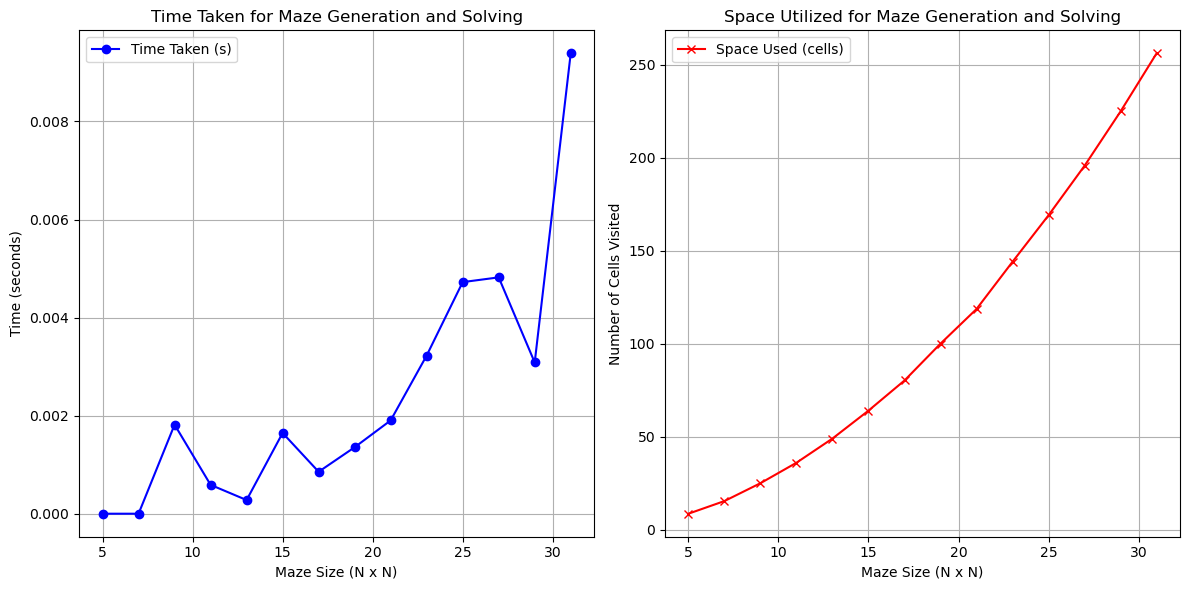

In [182]:
import random
import time
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.setrecursionlimit(10**6)  # Increase recursion limit for large mazes

# Maze generation and solving

def generate_grid(grid_length, grid_height):
    return [[1 for _ in range(grid_length)] for _ in range(grid_height)]

def validate_cell(cell, grid, grid_length, grid_height):
    return 0 <= cell[0] < grid_length and 0 <= cell[1] < grid_height and grid[cell[0]][cell[1]] == 1

def create_maze(grid, cell, grid_length, grid_height):
    directions = [(0, 2), (2, 0), (-2, 0), (0, -2)]
    visited = []
    
    def dfs(cell):
        visited.append(cell)
        grid[cell[0]][cell[1]] = 0
        random.shuffle(directions)
        
        for direction in directions:
            new_cell = tuple(a + b for a, b in zip(cell, direction))
            if validate_cell(new_cell, grid, grid_length, grid_height):
                wall_cell = (cell[0] + direction[0] // 2, cell[1] + direction[1] // 2)
                grid[wall_cell[0]][wall_cell[1]] = 0
                dfs(new_cell)
    
    dfs(cell)
    return visited

def solve_maze_dfs(maze, start, grid_length, grid_height):
    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    visited = []
    
    def dfs(cell):
        if cell in visited:
            return
        visited.append(cell)
        maze[cell[0]][cell[1]] = 2
        random.shuffle(directions)
        for direction in directions:
            new_cell = tuple(a + b for a, b in zip(cell, direction))
            if 0 <= new_cell[0] < grid_length and 0 <= new_cell[1] < grid_height and maze[new_cell[0]][new_cell[1]] == '.':
                dfs(new_cell)
                
    dfs(start)
    return visited

# Performance measurement

def measure_performance(grid_size_range, trials=5):
    times = []
    spaces = []

    for size in grid_size_range:
        avg_time = 0
        avg_space = 0
        for _ in range(trials):
            grid = generate_grid(size, size)
            start_cell = (0, 0)

            start_time = time.time()
            visited_cells = create_maze(grid, start_cell, size, size)
            grid[random.choice(visited_cells)[0]][random.choice(visited_cells)[1]] = 'E'
            
            solve_maze_dfs(grid, start_cell, size, size)
            elapsed_time = time.time() - start_time
            
            avg_time += elapsed_time / trials
            avg_space += len(visited_cells) / trials

        times.append(avg_time)
        spaces.append(avg_space)
    
    return times, spaces

# Visualization

def plot_results(grid_size_range, times, spaces):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(grid_size_range, times, marker='o', color='b', label='Time Taken (s)')
    plt.xlabel('Maze Size (N x N)')
    plt.ylabel('Time (seconds)')
    plt.title('Time Taken for Maze Generation and Solving')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(grid_size_range, spaces, marker='x', color='r', label='Space Used (cells)')
    plt.xlabel('Maze Size (N x N)')
    plt.ylabel('Number of Cells Visited')
    plt.title('Space Utilized for Maze Generation and Solving')
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.savefig("perf_dfs_random_point.jpg")
    plt.show()

# Main Execution
if __name__ == "__main__":
    grid_size_range = list(range(5, 32, 2))  # Odd sizes from 5x5 to 31x31
    times, spaces = measure_performance(grid_size_range)
    plot_results(grid_size_range, times, spaces)

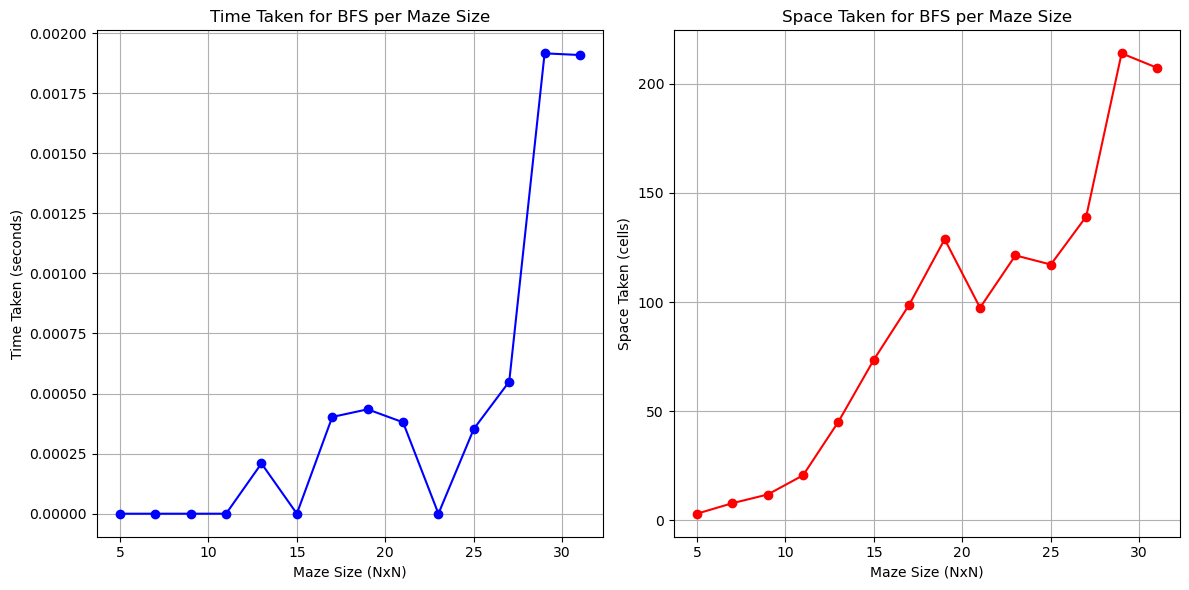

In [185]:
import random
import time
import matplotlib.pyplot as plt
from collections import deque
import numpy as np

# Function to create maze
def create_maze(grid, cell):
    directions = [(0, 2), (2, 0), (-2, 0), (0, -2)]
    visited = []
    grid[cell[0]][cell[1]] = 0  # Mark start cell as path
    visited.append(cell)
    
    def validate_cell(cell):
        return 0 <= cell[0] < len(grid) and 0 <= cell[1] < len(grid[0]) and grid[cell[0]][cell[1]] == 1
    
    random.shuffle(directions)
    
    def carve_path(current_cell):
        for direction in directions:
            new_cell = tuple(a + b for a, b in zip(direction, current_cell))
            if validate_cell(new_cell):
                wall_cell = (current_cell[0] + direction[0] // 2, current_cell[1] + direction[1] // 2)
                grid[wall_cell[0]][wall_cell[1]] = 0
                grid[new_cell[0]][new_cell[1]] = 0
                visited.append(new_cell)
                carve_path(new_cell)
    
    carve_path(cell)

# BFS function to solve the maze
def BFS(maze, start_cell=(0, 0)):
    queue = deque([start_cell])
    visited = set()
    directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    
    def is_valid(cell):
        x, y = cell
        return 0 <= x < len(maze) and 0 <= y < len(maze[0]) and maze[x][y] != 1 and cell not in visited
    
    while queue:
        current_cell = queue.popleft()
        x, y = current_cell
        
        if maze[x][y] == 99:
            return True  # Target found
        
        visited.add(current_cell)
        maze[x][y] = 2  # Mark path
        
        for dx, dy in directions:
            new_cell = (x + dx, y + dy)
            if is_valid(new_cell):
                queue.append(new_cell)
                visited.add(new_cell)
    
    return False  # Target not found

# Function to generate maze and calculate performance
def measure_performance(grid_length, grid_height):
    # Generate random maze
    grid = [[1 for _ in range(grid_length)] for _ in range(grid_height)]
    create_maze(grid, (0, 0))
    
    # Set the goal
    grid[random.randint(0, grid_height-1)][random.randint(0, grid_length-1)] = 99
    
    
    # Time BFS
    start_time = time.time()
    BFS(grid)
    end_time = time.time()
    
    # Return time taken and space (number of visited cells) taken
    time_taken = end_time - start_time
    space_taken = len([cell for row in grid for cell in row if cell == 2])
    
    return time_taken, space_taken

# Variables to store results
sizes = [i for i in range(5, 32, 2)]  # Maze sizes from 5x5 to 31x31 (odd numbers only)
avg_times = []
avg_spaces = []

# Measure performance for each grid size (5 mazes per size)
for size in sizes:
    times = []
    spaces = []
    
    for _ in range(5):  # Average over 5 mazes
        time_taken, space_taken = measure_performance(size, size)
        times.append(time_taken)
        spaces.append(space_taken)
    
    avg_times.append(np.mean(times))
    avg_spaces.append(np.mean(spaces))

# Plot results using matplotlib
plt.figure(figsize=(12, 6))

# Time Plot
plt.subplot(1, 2, 1)
plt.plot(sizes, avg_times, marker='o', color='b', label='Time Taken (s)')
plt.xlabel('Maze Size (NxN)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for BFS per Maze Size')
plt.grid(True)

# Space Plot
plt.subplot(1, 2, 2)
plt.plot(sizes, avg_spaces, marker='o', color='r', label='Space Taken (cells)')
plt.xlabel('Maze Size (NxN)')
plt.ylabel('Space Taken (cells)')
plt.title('Space Taken for BFS per Maze Size')
plt.grid(True)

plt.tight_layout()
plt.savefig("BFS_random_point.png")
plt.show()


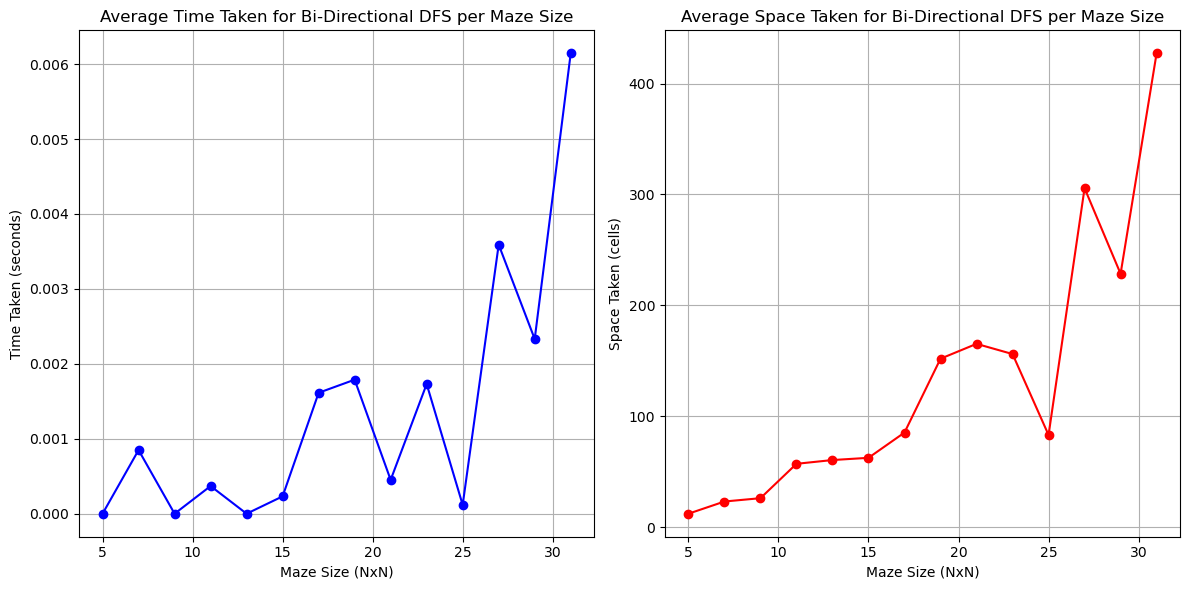

In [188]:
import random
import time
import matplotlib.pyplot as plt
from collections import deque
import numpy as np

# Bi-directional DFS function
def bi_directional_dfs(maze, start=(0, 0), goal=None):
    if goal is None:
        goal = (len(maze) - 1, len(maze[0]) - 1)  # Default goal: bottom-right corner

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def validate_cell(cell):
        return (0 <= cell[0] < len(maze) and 
                0 <= cell[1] < len(maze[0]) and 
                maze[cell[0]][cell[1]] == 0)

    start_stack, end_stack = [start], [goal]
    start_visited_dict, end_visited_dict = {start: None}, {goal: None}

    # Mark starting and ending points
    maze[start[0]][start[1]] = 2
    maze[goal[0]][goal[1]] = 3

    while start_stack and end_stack:
        # Expand from the start stack
        if start_stack:
            start_cell = start_stack.pop()
            for direction in directions:
                new_start_cell = (start_cell[0] + direction[0], start_cell[1] + direction[1])
                if validate_cell(new_start_cell) and new_start_cell not in start_visited_dict:
                    start_stack.append(new_start_cell)
                    start_visited_dict[new_start_cell] = start_cell
                    maze[new_start_cell[0]][new_start_cell[1]] = 2  # Mark cell as visited by start

        # Expand from the end stack
        if end_stack:
            end_cell = end_stack.pop()
            for direction in directions:
                new_end_cell = (end_cell[0] + direction[0], end_cell[1] + direction[1])
                if validate_cell(new_end_cell) and new_end_cell not in end_visited_dict:
                    end_stack.append(new_end_cell)
                    end_visited_dict[new_end_cell] = end_cell
                    maze[new_end_cell[0]][new_end_cell[1]] = 3  # Mark cell as visited by end

        # Check if the two searches meet
        for cell in start_visited_dict:
            if cell in end_visited_dict:
                # Path found, reconstruct it
                path = []
                current_cell = cell
                
                # Reconstruct path from start to meeting point
                while current_cell != start:
                    path.append(current_cell)
                    current_cell = start_visited_dict[current_cell]
                path.append(start)

                # Reconstruct path from goal to meeting point
                current_cell = end_visited_dict[cell]
                while current_cell != goal:
                    path.append(current_cell)
                    current_cell = end_visited_dict[current_cell]
                path.append(goal)

                return path[::-1]  # Return the path from start to goal

    # No path found
    return None

# Function to generate maze and calculate performance
def measure_performance(grid_length, grid_height):
    # Generate random maze
    grid = [[1 for _ in range(grid_length)] for _ in range(grid_height)]
    create_maze(grid, (0, 0))
    
    # Set the goal
    grid[random.randint(0, grid_height-1)][random.randint(0, grid_length-1)] = 99
    
    # Time bi-directional DFS
    start_time = time.time()
    path = bi_directional_dfs(grid)
    end_time = time.time()
    
    # Return time taken and space (number of visited cells) taken
    time_taken = end_time - start_time
    space_taken = len([cell for row in grid for cell in row if cell == 2 or cell == 3])
    
    return time_taken, space_taken

# Variables to store results
sizes = [i for i in range(5, 32, 2)]  # Maze sizes from 5x5 to 31x31 (odd numbers only)
avg_times = []
avg_spaces = []

# Measure performance for each grid size (5 mazes per size)
for size in sizes:
    times = []
    spaces = []
    
    for _ in range(5):  # Average over 5 mazes
        time_taken, space_taken = measure_performance(size, size)
        times.append(time_taken)
        spaces.append(space_taken)
    
    avg_times.append(np.mean(times))
    avg_spaces.append(np.mean(spaces))

# Plot results using matplotlib
plt.figure(figsize=(12, 6))

# Time Plot
plt.subplot(1, 2, 1)
plt.plot(sizes, avg_times, marker='o', color='b', label='Time Taken (s)')
plt.xlabel('Maze Size (NxN)')
plt.ylabel('Time Taken (seconds)')
plt.title('Average Time Taken for Bi-Directional DFS per Maze Size')
plt.grid(True)

# Space Plot
plt.subplot(1, 2, 2)
plt.plot(sizes, avg_spaces, marker='o', color='r', label='Space Taken (cells)')
plt.xlabel('Maze Size (NxN)')
plt.ylabel('Space Taken (cells)')
plt.title('Average Space Taken for Bi-Directional DFS per Maze Size')
plt.grid(True)

plt.tight_layout()
plt.savefig("Bi-DFS_random.png")
plt.show()


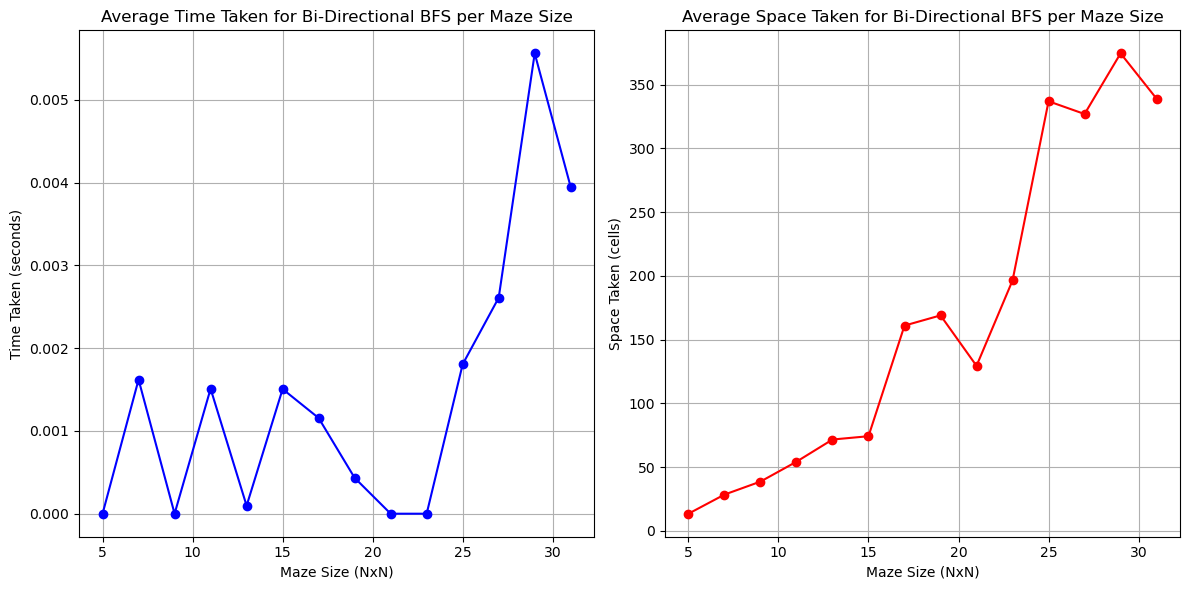

In [194]:
import random
import time
import matplotlib.pyplot as plt
from collections import deque
import numpy as np

# Bi-directional BFS function
def bi_directional_bfs(maze, start=(0, 0), goal=None):
    if goal is None:
        goal = (len(maze) - 1, len(maze[0]) - 1)  # Default goal: bottom-right corner

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

    def validate_cell(cell):
        return (0 <= cell[0] < len(maze) and 
                0 <= cell[1] < len(maze[0]) and 
                maze[cell[0]][cell[1]] == 0)

    # BFS queues for forward and backward search
    start_queue = deque([start])
    end_queue = deque([goal])
    
    # Visited dictionaries to track the search paths
    start_visited = {start: None}
    end_visited = {goal: None}

    # Mark the start and goal cells
    maze[start[0]][start[1]] = 2
    maze[goal[0]][goal[1]] = 3

    while start_queue and end_queue:
        # Expand the start queue
        if start_queue:
            current_start = start_queue.popleft()
            for direction in directions:
                new_start = (current_start[0] + direction[0], current_start[1] + direction[1])
                if validate_cell(new_start) and new_start not in start_visited:
                    start_queue.append(new_start)
                    start_visited[new_start] = current_start
                    maze[new_start[0]][new_start[1]] = 2  # Mark start path

        # Expand the end queue
        if end_queue:
            current_end = end_queue.popleft()
            for direction in directions:
                new_end = (current_end[0] + direction[0], current_end[1] + direction[1])
                if validate_cell(new_end) and new_end not in end_visited:
                    end_queue.append(new_end)
                    end_visited[new_end] = current_end
                    maze[new_end[0]][new_end[1]] = 3  # Mark end path

        # Check if paths meet
        for cell in start_visited:
            if cell in end_visited:
                # Path found, reconstruct it
                path = []

                # Reconstruct path from start to meeting point
                current_cell = cell
                while current_cell:
                    path.append(current_cell)
                    current_cell = start_visited[current_cell]
                
                path.reverse()  # Reverse to get from start to meeting point

                # Reconstruct path from goal to meeting point
                current_cell = end_visited[cell]
                while current_cell:
                    path.append(current_cell)
                    current_cell = end_visited[current_cell]

                return path

    # No path found
    return None

# Function to generate maze and calculate performance
def measure_performance(grid_length, grid_height):
    # Generate random maze
    grid = [[1 for _ in range(grid_length)] for _ in range(grid_height)]
    create_maze(grid, (0, 0))
    
    # Set the goal
    #grid[random.randint(0, grid_height-1)][random.randint(0, grid_length-1)] = 99
    goal_cell = (size - 1, size - 1)
    grid[goal_cell[0]][goal_cell[1]] = 99
    # Time bi-directional BFS
    start_time = time.time()
    path = bi_directional_bfs(grid)
    end_time = time.time()
    
    # Return time taken and space (number of visited cells) taken
    time_taken = end_time - start_time
    space_taken = len([cell for row in grid for cell in row if cell == 2 or cell == 3])
    
    return time_taken, space_taken

# Variables to store results
sizes = [i for i in range(5, 32, 2)]  # Maze sizes from 5x5 to 31x31 (odd numbers only)
avg_times = []
avg_spaces = []

# Measure performance for each grid size (5 mazes per size)
for size in sizes:
    times = []
    spaces = []
    
    for _ in range(5):  # Average over 5 mazes
        time_taken, space_taken = measure_performance(size, size)
        times.append(time_taken)
        spaces.append(space_taken)
    
    avg_times.append(np.mean(times))
    avg_spaces.append(np.mean(spaces))

# Plot results using matplotlib
plt.figure(figsize=(12, 6))

# Time Plot
plt.subplot(1, 2, 1)
plt.plot(sizes, avg_times, marker='o', color='b', label='Time Taken (s)')
plt.xlabel('Maze Size (NxN)')
plt.ylabel('Time Taken (seconds)')
plt.title('Average Time Taken for Bi-Directional BFS per Maze Size')
plt.grid(True)

# Space Plot
plt.subplot(1, 2, 2)
plt.plot(sizes, avg_spaces, marker='o', color='r', label='Space Taken (cells)')
plt.xlabel('Maze Size (NxN)')
plt.ylabel('Space Taken (cells)')
plt.title('Average Space Taken for Bi-Directional BFS per Maze Size')
plt.grid(True)

plt.tight_layout()
plt.savefig("Bi-BFS_end.png")
plt.show()
